In [6]:
import tensorflow as tf
import sys
import os
sys.path.append(os.getcwd())
from model.ResNet34 import resnet34
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def predict(image_path, class_labels):
    img = Image.open(image_path)
    img = img.resize((224, 224))
    img = np.asarray(img) / 255.0
    img = np.expand_dims(img, axis=0)

    model_path = './save_weights/resNet_34.ckpt'
    model = tf.keras.models.load_model(model_path)

    predict = model.predict(img)
    probabilities = tf.nn.softmax(predict, axis=-1)  
    predicted_class = np.argmax(probabilities, axis=-1)
    predicted_class_name = class_labels[predicted_class[0]]

    print(f"Probabilities: {probabilities.numpy()[0]}")
    print(f"Predicted class: {predicted_class}")
    print(f"Predicted class name: {predicted_class_name}")

    return predicted_class_name

def sample_test(chosen_class):
    class_labels = ['Mild', 'Moderate', 'Non Dementia', 'Very Mild']
    if chosen_class not in class_labels:
        raise ValueError(f"Class {chosen_class} is not in the class labels")
    if chosen_class == 'Mild' or chosen_class == 'Moderate':
        folder_path = f"Data/{chosen_class}_Dementia"
    elif chosen_class == 'Non Dementia':
        folder_path = f"Data/{chosen_class.replace(' ', '_')}"
    else:
        folder_path = f"Data/{chosen_class.replace(' ', '_')}_Dementia"
    if not os.path.exists(folder_path):
        NameError(f"Folder {folder_path} does not exist")
    files = os.listdir(folder_path)
    # Randomly choose an image from the chosen class
    random_image = np.random.choice(files)
    image_path = os.path.join(folder_path, random_image)
    
    # print(f"Random image: {image_path}")
    predicted_class_name = predict(image_path, class_labels)

    # Display
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis('off')
    text = f"True Class: {chosen_class}\nPredicted Class: {predicted_class_name}"
    plt.text(0, image.shape[0] + 50, text, fontsize=12, ha='left')
    plt.show()
    #print(f"The image is predicted to be: {predicted_class_name}")
    #print(f"The image is actually to be: {choosen_class}")

Probabilities: [0.32504934 0.18904074 0.1926164  0.2932936 ]
Predicted class: [0]
Predicted class name: Mild


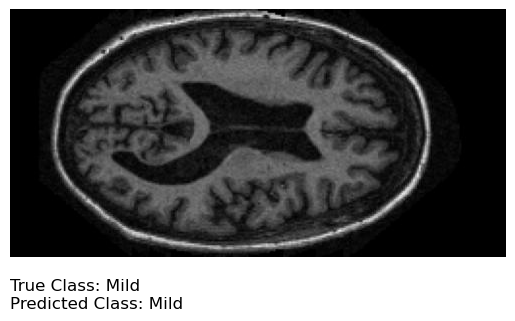

In [9]:
sample_test('Mild')

Probabilities: [0.17488609 0.4753139  0.17490713 0.17489295]
Predicted class: [1]
Predicted class name: Moderate


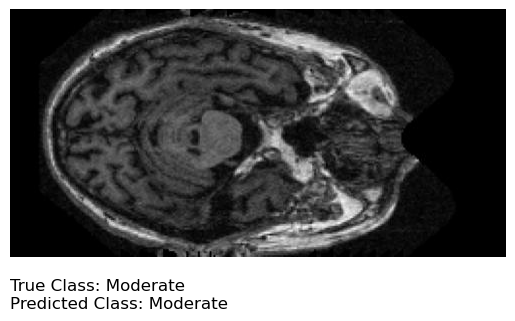

In [10]:
sample_test('Moderate')

Probabilities: [0.17487863 0.17487818 0.47536498 0.17487824]
Predicted class: [2]
Predicted class name: Non Dementia


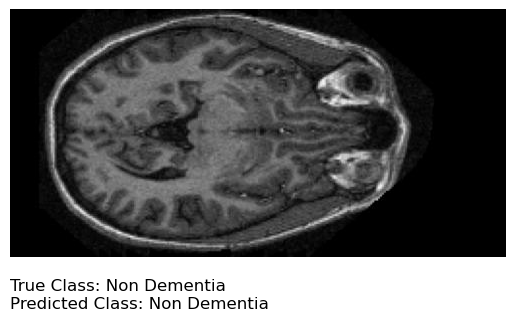

In [7]:
sample_test("Non Dementia")

Probabilities: [0.17830747 0.17566505 0.17566991 0.4703575 ]
Predicted class: [3]
Predicted class name: Very Mild


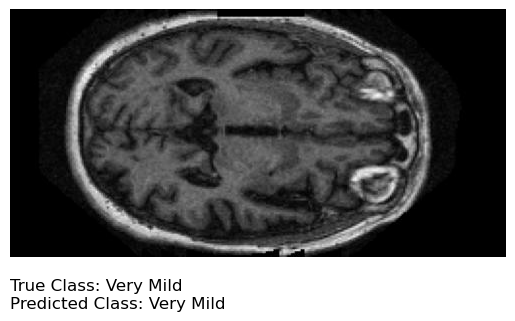

In [8]:
sample_test("Very Mild")